In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('whac.csv')
df.head()
print(df.shape)

df2 = pd.read_csv('c19.csv')
print(df2.head())
print(df2.shape)



(2096, 4)
               X             Y  ... Aged75to84  Aged85up
0 -856335.869598  7.036492e+06  ...        NaN       NaN
1 -856335.869598  7.036492e+06  ...        NaN       NaN
2 -856335.869598  7.036492e+06  ...        0.0       0.0
3 -856335.869598  7.036492e+06  ...        0.0       0.0
4 -856335.869598  7.036492e+06  ...        0.0       0.0

[5 rows x 41 columns]
(639, 41)


In [3]:
df_Ireland = df.loc[df['Entity'] == 'Ireland'].reset_index()
# df_Ireland = df_Ireland.reset_index()
print(df_Ireland.shape)



(84, 5)


In [4]:
print(df2['Date'])

0      2020/02/29 00:00:00+00
1      2020/03/03 00:00:00+00
2      2020/03/04 00:00:00+00
3      2020/03/05 00:00:00+00
4      2020/03/06 00:00:00+00
                ...          
634    2021/11/26 00:00:00+00
635    2021/11/27 00:00:00+00
636    2021/11/28 00:00:00+00
637    2021/11/29 00:00:00+00
638    2021/11/30 00:00:00+00
Name: Date, Length: 639, dtype: object


0       0.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
634    26.0
635    39.0
636    41.0
637    19.0
638     8.0
Name: new_HCC, Length: 639, dtype: float64


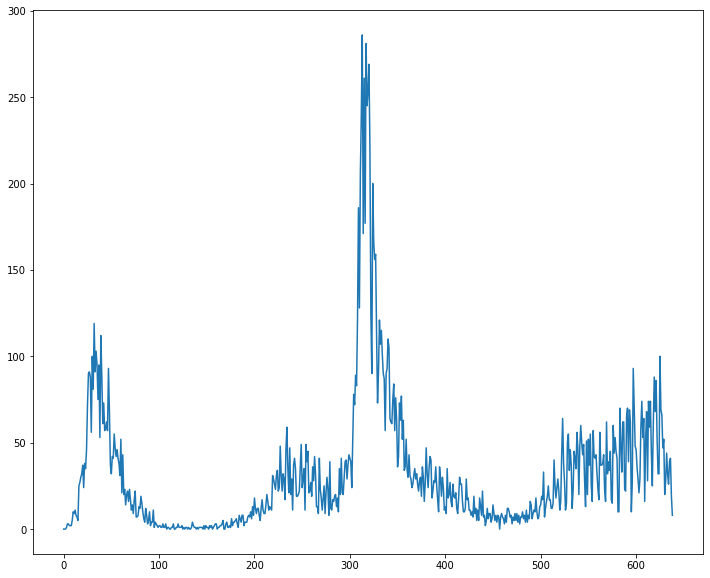

In [100]:
# df_Ireland['Day'] = pd.to_datetime(df_Ireland['Day'])
# for index, row in df_Ireland.iterrows():
#     print(index, row['Day'], row['Entity'], row['Weekly new hospital admissions'])

# print(df_Ireland.dtypes)


df2['Date'] = pd.to_datetime(df2['Date'])
df2['HCC'] = df2['HospitalisedCovidCases'].fillna(0)

# for index, row in df2.iterrows():
#     print(index, row['Date'], row['HCC'])

prev_num = 0
df2['new_HCC'] = df2['HCC']
for index,row in df2.iterrows():
  df2.at[index, 'new_HCC'] = row['HCC'] - prev_num
  prev_num = row['HCC']
  # print(prev_num)
  # print(index, row['Date'], row['HCC'], df2.at[index, 'new_HCC'])

print(df2['new_HCC'])
# print(df2.columns)
plt.plot(df2['new_HCC'])



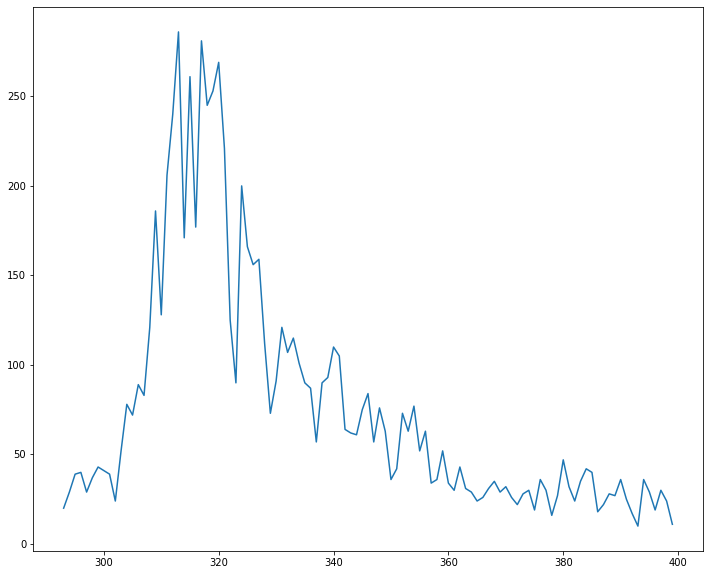

In [102]:
# i_range = []
# for i in range(293,400):
#   i_range.append(df2.Index[i, 'new_HCC'])

plt.plot(df2.iloc[293:400,42])
plt.show()

In [115]:
print("")

In [103]:
start=pd.to_datetime('2020-12-20 00:00:00+00:00')
print("Start: ", start)
end=pd.to_datetime('2021-03-09 00:00:00+00:00')
print("End: ", end)
t_full=pd.array(pd.DatetimeIndex(df2.iloc[293:400,2])).astype(np.int64)
print("Tfull: ", t_full)
dt = t_full[1] - t_full[0] 
print("Data sampling interval", dt)

Start:  2020-12-20 00:00:00+00:00
End:  2021-03-09 00:00:00+00:00
Tfull:  [1608422400000000000 1608508800000000000 1608595200000000000
 1608681600000000000 1608768000000000000 1608854400000000000
 1608940800000000000 1609027200000000000 1609113600000000000
 1609200000000000000 1609286400000000000 1609372800000000000
 1609459200000000000 1609545600000000000 1609632000000000000
 1609718400000000000 1609804800000000000 1609891200000000000
 1609977600000000000 1610064000000000000 1610150400000000000
 1610236800000000000 1610323200000000000 1610409600000000000
 1610496000000000000 1610582400000000000 1610668800000000000
 1610755200000000000 1610841600000000000 1610928000000000000
 1611014400000000000 1611100800000000000 1611187200000000000
 1611273600000000000 1611360000000000000 1611446400000000000
 1611532800000000000 1611619200000000000 1611705600000000000
 1611792000000000000 1611878400000000000 1611964800000000000
 1612051200000000000 1612137600000000000 1612224000000000000
 1612310400

Int64Index([1608422400000000000], dtype='int64')
Int64Index([1615248000000000000], dtype='int64')
[1608422400000000000 1608508800000000000 1608595200000000000
 1608681600000000000 1608768000000000000 1608854400000000000
 1608940800000000000 1609027200000000000 1609113600000000000
 1609200000000000000 1609286400000000000 1609372800000000000
 1609459200000000000 1609545600000000000 1609632000000000000
 1609718400000000000 1609804800000000000 1609891200000000000
 1609977600000000000 1610064000000000000 1610150400000000000
 1610236800000000000 1610323200000000000 1610409600000000000
 1610496000000000000 1610582400000000000 1610668800000000000
 1610755200000000000 1610841600000000000 1610928000000000000
 1611014400000000000 1611100800000000000 1611187200000000000
 1611273600000000000 1611360000000000000 1611446400000000000
 1611532800000000000 1611619200000000000 1611705600000000000
 1611792000000000000 1611878400000000000 1611964800000000000
 1612051200000000000 1612137600000000000 1612224

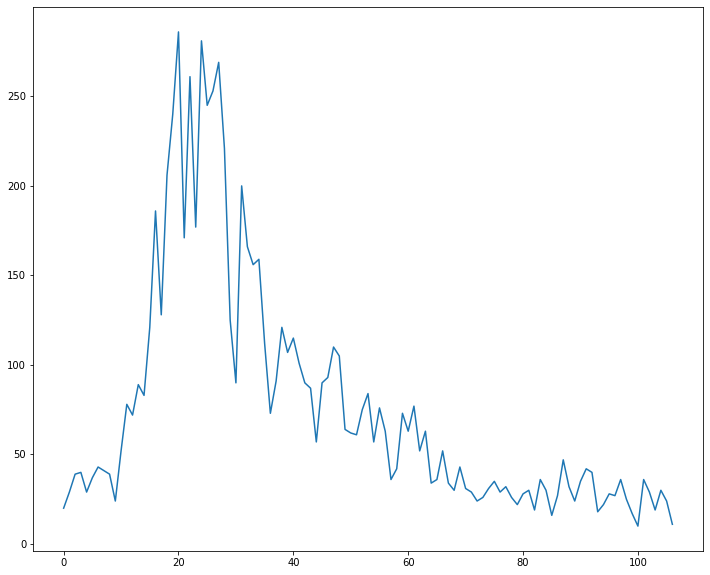

In [108]:
t_start = pd.DatetimeIndex([start]).astype(np.int64)
t_end = pd.DatetimeIndex([end]).astype(np.int64)
print(t_start)
print(t_end)
print(t_full)
# d = (t_full>=start) & (t_full<=end)
t = np.extract([(t_full[0]>=t_start) & (t_full[t_full.size-1]<=t_end)], df2[:9])
print("t=",t)
t = (t_full[1]-t_full[0])/60/60/24
print(t)
# print(df_Ireland.iloc[35:53,4])
ss = pd.array(pd.Index(df2.iloc[293:400,42])).astype(np.int64)
print(ss)
plt.plot(ss)
plt.show()

0.0 [0.04050868 0.15605873 0.66937175]
[ 31.44137493  34.0359121   27.23396844  30.91280511  35.73190989
  35.65358823  34.24577938  23.81206834  40.132579    61.29825856
  62.47379812  73.96999125  72.36370702  97.5521287  146.74847184
 119.60805772 165.40071231 197.9824288  237.23920326 168.81744896
 212.97755208 166.13711209 226.2886223  215.01861758 218.96838049
 229.46848566 200.15965087 129.05728311  88.70321731 152.98322048
 145.97323712 138.42947812 137.49971085 106.10232804  72.78359575
  76.84208871  98.15245957  94.19217323  98.57758554  89.88772932
  80.66388738  76.37200457  55.37708043  72.66306024  78.60585297
  91.79013543  91.2178011   63.68191343  55.7422187   53.09987346
  62.23400184  70.40266107  54.30127399  63.17032972  56.33987835
  37.0077427   36.28377466  56.87691675  55.26407192  64.33045831
  49.37589996  53.40464257  34.69679079  31.95542672  41.80274031
  32.33200586  27.49360071  34.84204222  28.67630996  25.99147463
  21.84639423  22.32382672  25.780259

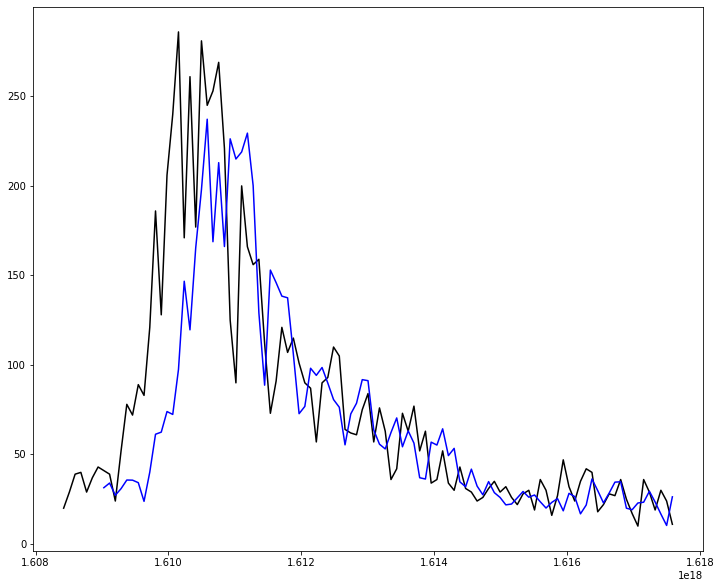

In [113]:
stride = 1 
lag = 3
dd = 1
q = 4
XX = ss[0:ss.size - q - lag * dd:stride]
# print(XX)
for i in range(1,lag): 
  X = ss[i*dd:ss.size - q - (lag-i)*dd:stride]
  XX=np.column_stack((XX,X))
# print(XX)
yy = y[lag*dd+q::stride]
# print(yy)
tt = t_full[lag*dd+q::stride]
# print(tt)
from sklearn.model_selection import train_test_split 
train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

from sklearn.linear_model import Ridge 
model = Ridge(fit_intercept=False, alpha=1).fit(XX[train], yy[train]) 
print(model.intercept_, model.coef_)

y_pred = model.predict(XX) 
print(y_pred)
plt.rcParams["figure.figsize"] = 12,10
plt.plot(t_full, ss, color='black')
plt.plot(tt, y_pred, color='blue')

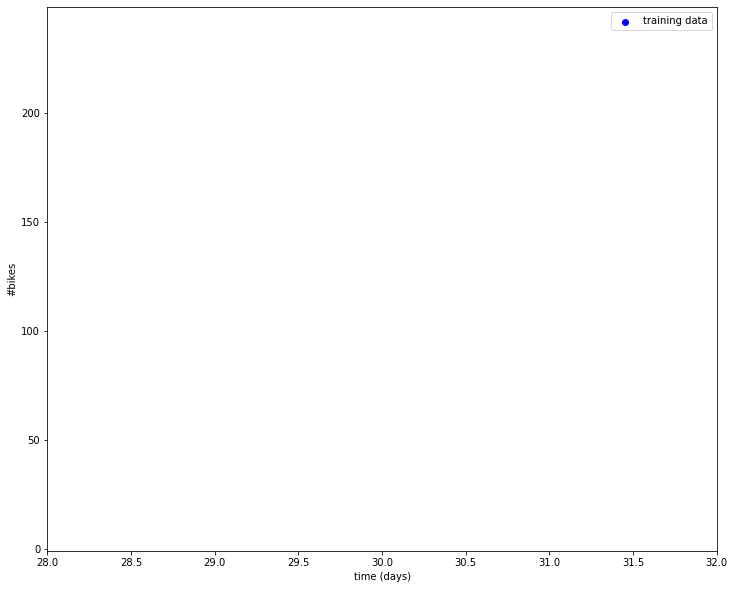